# VMD


:: empymod START  ::  v2.1.1

   depth       [m] :  0 10 50 60
   res     [Ohm.m] :  2E+14 100 10 100 1000
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  0.1 - 1E+06 : 1001  [min-max; #]
   Hankel          :  DLF (Fast Hankel Transform)
     > Filter      :  Key 201 (2009)
     > DLF type    :  Standard
   Loop over       :  None (all vectorized)
   Source(s)       :  1 dipole(s)
     > x       [m] :  0
     > y       [m] :  0
     > z       [m] :  20
     > azimuth [°] :  0
     > dip     [°] :  90
   Receiver(s)     :  1 dipole(s)
     > x       [m] :  10
     > y       [m] :  0
     > z       [m] :  20
     > azimuth [°] :  0
     > dip     [°] :  90
   Required ab's   :  33

:: empymod END; runtime = 0:00:00.157795 :: 1 kernel call(s)



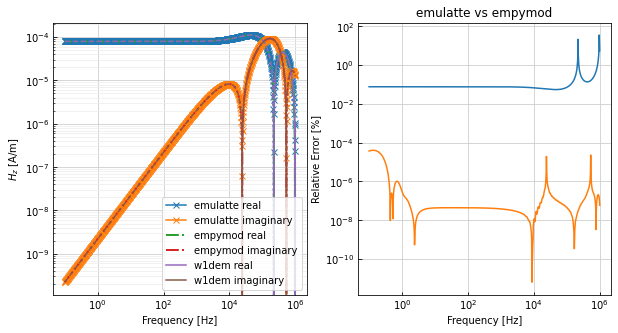

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = [10, 40, 10]
res = [2e14, 100, 10, 100, 1000]
sc = [0, 0, 20]
rc = [10, 0, 20]
freqs = np.logspace(-1, 6, 1001)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
vmd = fwd.transmitter('VMD', freqs, moment=1)
model.locate(vmd, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

emu_re = ans['h_z'].real
emu_im = ans['h_z'].imag

#empymod
inp = {
    'src' : [0, 0, 20, 0, 90],
    'rec' : [10, 0, 20, 0, 90],
    'depth' : [0, *np.cumsum(thicks)],
    'res' : res,
    'freqtime' : freqs,
    'verb' : 3
}
fEM = empymod.loop(**inp)

epm_re = fEM.real
epm_im = fEM.imag

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [20]
rx = [10]
ry = [0]
rz = [20]

dipole_mom = 1
thickness = [10, 40, 10]
freqtime = np.logspace(-1, 6, 1001)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1
res = np.array([100, 10, 100, 1000])

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.vmd(dipole_mom=dipole_mom)
wem = bns['h_z']

w1d_re = wem.real
w1d_im = wem.imag

fig = plt.figure(figsize=(10,5), facecolor='w')
ax = fig.add_subplot(121)
ax.plot(freqtime, emu_re, "C0-x", label='emulatte real')
ax.plot(freqtime, -emu_re, "C0--x")
ax.plot(freqtime, emu_im, "C1-x", label='emulatte imaginary')
ax.plot(freqtime, -emu_im, "C1--x")
ax.plot(freqtime, epm_re, "C2-.", linewidth=2, label='empymod real')
ax.plot(freqtime, -epm_re, "C2:", linewidth=2)
ax.plot(freqtime, epm_im, "C3-.", linewidth=2, label='empymod imaginary')
ax.plot(freqtime, -epm_im, "C3:", linewidth=2)
ax.plot(freqtime, w1d_re, "C4-", label='w1dem real')
ax.plot(freqtime, -w1d_re, "C4--")
ax.plot(freqtime, w1d_im, "C5-", label='w1dem imaginary')
ax.plot(freqtime, -w1d_im, "C5--")

ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.legend()

rmspe_real = abs((epm_re - emu_re)/epm_re) * 100
rmspe_imag = abs((epm_im - emu_im)/epm_im) * 100
bx = fig.add_subplot(122)
bx.plot(freqtime, rmspe_real, 'C0-', label='real')
bx.plot(freqtime, rmspe_imag, 'C1-', label='imaginary')
bx.grid(which='major', c='#ccc')
bx.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
bx.set_yscale('log')
bx.set_xscale('log')
bx.set_xlabel('Frequency [Hz]')
bx.set_ylabel('Relative Error [%]');
bx.set_title('emulatte vs empymod')
plt.show()

# Circular


:: empymod START  ::  v2.1.1

   depth       [m] :  0
   res     [Ohm.m] :  2E+14 100
   aniso       [-] :  1 1
   epermH      [-] :  1 1
   epermV      [-] :  1 1
   mpermH      [-] :  1 1
   mpermV      [-] :  1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  0.1 - 1E+06 : 50  [min-max; #]
   Hankel          :  DLF (Fast Hankel Transform)
     > Filter      :  Key 201 (2009)
     > DLF type    :  Standard
   Loop over       :  None (all vectorized)
   Source(s)       :  1 dipole(s)
     > x       [m] :  50
     > y       [m] :  0
     > z       [m] :  0
     > azimuth [°] :  90
     > dip     [°] :  0
   Receiver(s)     :  1 dipole(s)
     > x       [m] :  0
     > y       [m] :  0
     > z       [m] :  0
     > azimuth [°] :  0
     > dip     [°] :  90
   Required ab's   :  26

:: empymod END; runtime = 0:00:00.074658 :: 1 kernel call(s)



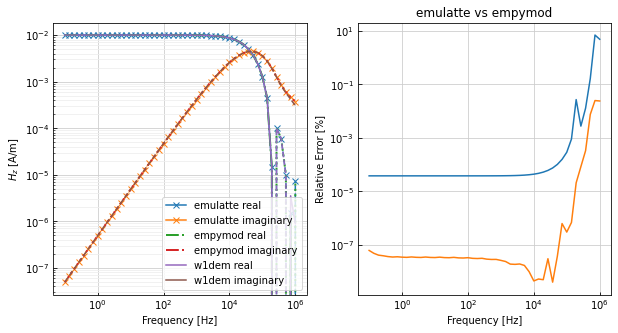

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [0, 0, 0]
freqs = np.logspace(-1, 6, 50)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
cl = fwd.transmitter('CircularLoop', freqs, current=1, radius=50, turns=1)
model.locate(cl, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

emu_re = ans['h_z'].real
emu_im = ans['h_z'].imag

#empymod
radius = 50
area = np.pi * radius ** 2
strength = 2 * np.pi * radius
inp = {
    'src' : [50, 0, 0, 90, 0],
    'rec' : [0, 0, 0, 0, 90],
    'depth' : [0, *np.cumsum(thicks)],
    'res' : res,
    'freqtime' : freqs,
    'strength' : strength,
    'mrec' : True,
    'verb' : 3
}
fEM = empymod.bipole(**inp)

epm_re = fEM.real
epm_im = fEM.imag

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [0]
rx = [0]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = []
freqtime = np.logspace(-1, 6, 50)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1
res = np.array([100])

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.circular_loop(current=1, rad=50, turns=1)
wem = bns['h_z']

w1d_re = wem.real
w1d_im = wem.imag

fig = plt.figure(figsize=(10,5), facecolor='w')
ax = fig.add_subplot(121)
ax.plot(freqtime, emu_re, "C0-x", label='emulatte real')
ax.plot(freqtime, -emu_re, "C0--x")
ax.plot(freqtime, emu_im, "C1-x", label='emulatte imaginary')
ax.plot(freqtime, -emu_im, "C1--x")
ax.plot(freqtime, epm_re, "C2-.", linewidth=2, label='empymod real')
ax.plot(freqtime, -epm_re, "C2:", linewidth=2)
ax.plot(freqtime, epm_im, "C3-.", linewidth=2, label='empymod imaginary')
ax.plot(freqtime, -epm_im, "C3:", linewidth=2)
ax.plot(freqtime, w1d_re, "C4-", label='w1dem real')
ax.plot(freqtime, -w1d_re, "C4--")
ax.plot(freqtime, w1d_im, "C5-", label='w1dem imaginary')
ax.plot(freqtime, -w1d_im, "C5--")

ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.legend()

rmspe_real = abs((epm_re - emu_re)/epm_re) * 100
rmspe_imag = abs((epm_im - emu_im)/epm_im) * 100
bx = fig.add_subplot(122)
bx.plot(freqtime, rmspe_real, 'C0-', label='real')
bx.plot(freqtime, rmspe_imag, 'C1-', label='imaginary')
bx.grid(which='major', c='#ccc')
bx.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
bx.set_yscale('log')
bx.set_xscale('log')
bx.set_xlabel('Frequency [Hz]')
bx.set_ylabel('Relative Error [%]');
bx.set_title('emulatte vs empymod')
plt.show()

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd
import ex1dem.w1dem as w1dem

#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [0, 0, 0]
freqs = 1
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
cl = fwd.transmitter('CircularLoop', freqs, current=1, radius=50, turns=1)
model.locate(cl, sc, rc)
ans, freqtime = model.emulate(hankel_filter='key201')

#w1dem
fdtd = 1
tx = [0]
ty = [0]
tz = [0]
rx = [0]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = []
freqtime = np.logspace(-1, 6, 50)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1
res = np.array([100])

w1fd = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1fd.circular_loop(current=1, rad=50, turns=1)

In [2]:
emu = model.lambda_
emu

array([8.23717742e-08, 9.32461557e-08, 1.05556128e-07, 1.19491212e-07,
       1.35265949e-07, 1.53123201e-07, 1.73337894e-07, 1.96221247e-07,
       2.22125565e-07, 2.51449665e-07, 2.84645012e-07, 3.22222671e-07,
       3.64761178e-07, 4.12915442e-07, 4.67426834e-07, 5.29134595e-07,
       5.98988759e-07, 6.78064782e-07, 7.67580094e-07, 8.68912849e-07,
       9.83623136e-07, 1.11347700e-06, 1.26047364e-06, 1.42687616e-06,
       1.61524646e-06, 1.82848463e-06, 2.06987362e-06, 2.34312979e-06,
       2.65246011e-06, 3.00262694e-06, 3.39902135e-06, 3.84774612e-06,
       4.35570967e-06, 4.93073248e-06, 5.58166742e-06, 6.31853611e-06,
       7.15268315e-06, 8.09695085e-06, 9.16587687e-06, 1.03759181e-05,
       1.17457040e-05, 1.32963233e-05, 1.50516490e-05, 1.70387055e-05,
       1.92880851e-05, 2.18344184e-05, 2.47169082e-05, 2.79799324e-05,
       3.16737275e-05, 3.58551623e-05, 4.05886127e-05, 4.59469538e-05,
       5.20126809e-05, 5.88791803e-05, 6.66521666e-05, 7.54513104e-05,
      

In [3]:
w1 = w1fd.lamda.reshape(emu.shape)
w1

array([8.23717742e-08, 9.32461557e-08, 1.05556128e-07, 1.19491212e-07,
       1.35265949e-07, 1.53123201e-07, 1.73337894e-07, 1.96221247e-07,
       2.22125565e-07, 2.51449665e-07, 2.84645012e-07, 3.22222671e-07,
       3.64761178e-07, 4.12915442e-07, 4.67426834e-07, 5.29134595e-07,
       5.98988759e-07, 6.78064782e-07, 7.67580094e-07, 8.68912849e-07,
       9.83623136e-07, 1.11347700e-06, 1.26047364e-06, 1.42687616e-06,
       1.61524646e-06, 1.82848463e-06, 2.06987362e-06, 2.34312979e-06,
       2.65246011e-06, 3.00262694e-06, 3.39902135e-06, 3.84774612e-06,
       4.35570967e-06, 4.93073248e-06, 5.58166742e-06, 6.31853611e-06,
       7.15268315e-06, 8.09695085e-06, 9.16587687e-06, 1.03759181e-05,
       1.17457040e-05, 1.32963233e-05, 1.50516490e-05, 1.70387055e-05,
       1.92880851e-05, 2.18344184e-05, 2.47169082e-05, 2.79799324e-05,
       3.16737275e-05, 3.58551623e-05, 4.05886127e-05, 4.59469538e-05,
       5.20126809e-05, 5.88791803e-05, 6.66521666e-05, 7.54513104e-05,
      

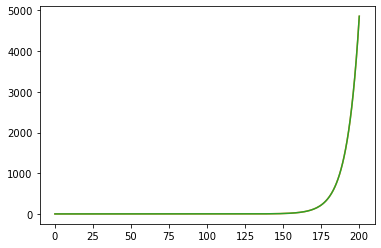

In [5]:
w1a = w1.real
#.reshape(402)
ema = emu.real
#.reshape(402)
err = abs((w1a-ema)/w1a) * 100
plt.plot(np.log10(err))
plt.plot(w1a)
plt.plot(ema)

In [17]:
model.rlayer

1

In [16]:
w1fd.rlayer

1